# PART 1

## distribution of integration and productivity scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/hjk2160@columbia.edu/Desktop/dataset.csv'
students_df = pd.read_csv(file_path)

students_df.columns = students_df.columns.str.strip().str.lower().str.replace(' ', '_')

students_df['integration_productivity_score'] = students_df['graduation_points'] + students_df['language_scores'] + students_df['prioritization_scores']
students_df['cultural_fit_score'] = students_df['community_involvement'] + students_df['team_player_scores']

students_df['integration_productivity_score'] /= students_df['integration_productivity_score'].max()
students_df['cultural_fit_score'] /= students_df['cultural_fit_score'].max()

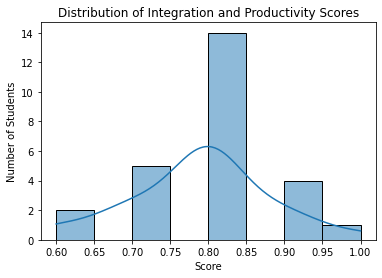

In [2]:
sns.histplot(data=students_df, x='integration_productivity_score', kde=True)
plt.title('Distribution of Integration and Productivity Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

## Distribution of Cultural Fit Scores

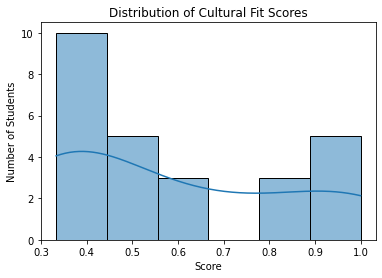

In [3]:
sns.histplot(data=students_df, x='cultural_fit_score', kde=True)
plt.title('Distribution of Cultural Fit Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

## Correlation Heatmap

In [4]:
file_path2 = '/Users/hjk2160@columbia.edu/Desktop/dashboard_data.csv'
students_df2 = pd.read_csv(file_path2)
students_df2.columns = students_df2.columns.str.strip().str.lower().str.replace(' ', '_')


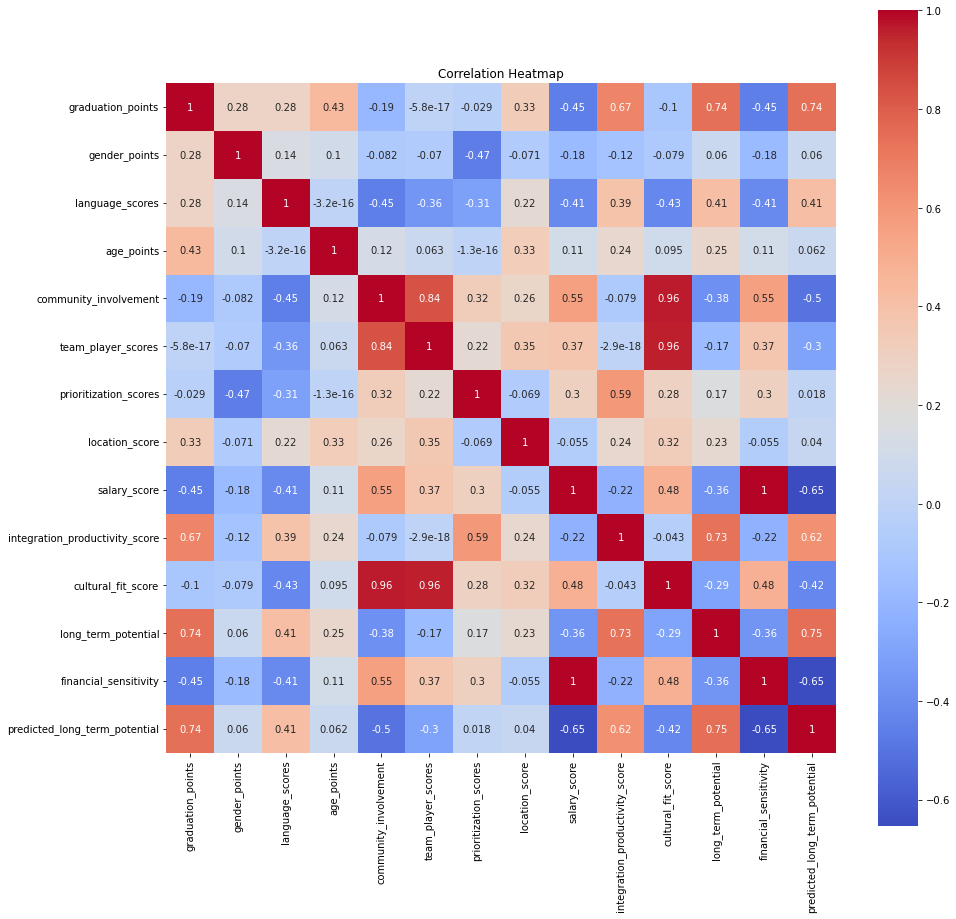

In [5]:
#히트맵을 통한 데이터 상관관계 확인하기
plt.figure(figsize=(15, 15))
corr = students_df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot of Selected Variables

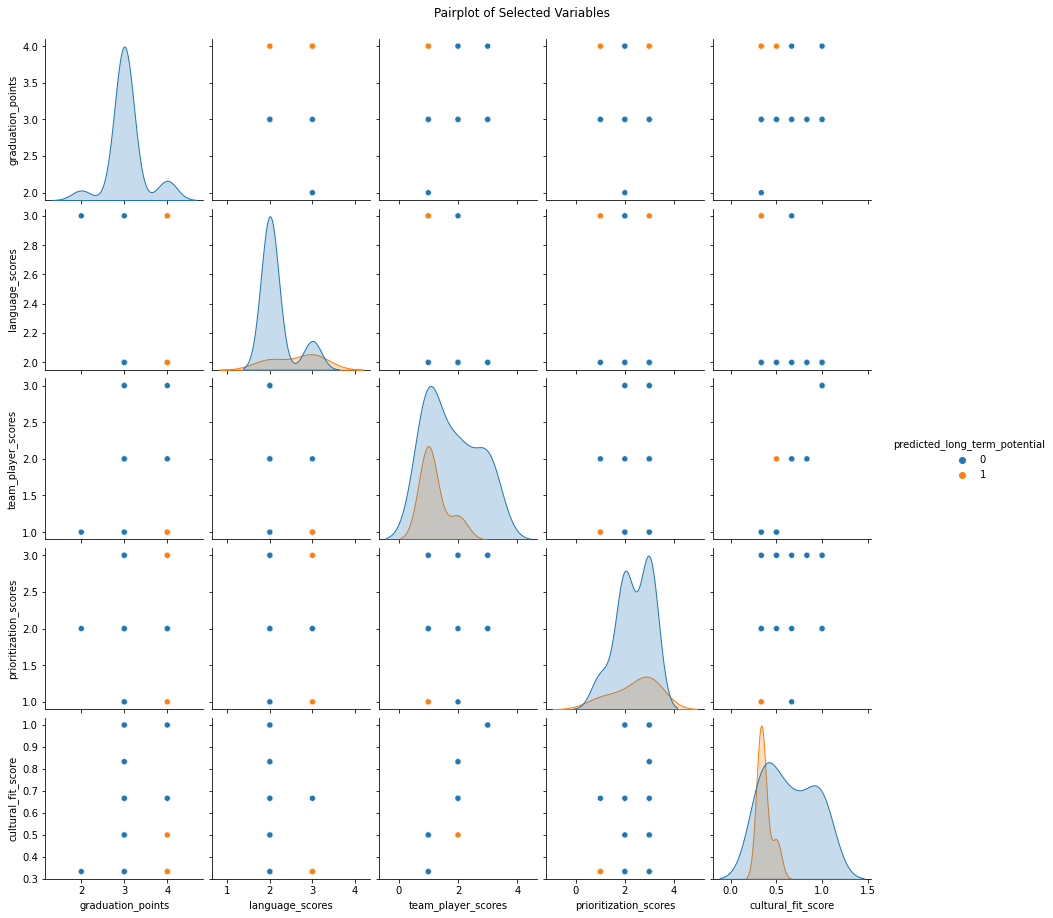

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['graduation_points', 'language_scores', 'team_player_scores', 'prioritization_scores', 'cultural_fit_score']
sns.pairplot(students_df2[selected_columns + ['predicted_long_term_potential']], hue='predicted_long_term_potential')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# PART 2

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the 80th percentile score to identify the top 20%
threshold = students_df['integration_productivity_score'].quantile(0.80)

# Create a new column to segment students
students_df['long_term_potential'] = students_df['integration_productivity_score'].apply(lambda x: 1 if x >= threshold else 0)

# Feature Engineering
students_df['financial_sensitivity'] = students_df['salary_score'] * 0.7

features = ['community_involvement', 'team_player_scores', 'prioritization_scores', 
            'graduation_points', 'salary_score', 'age_points', 'gender_points', 
            'location_score', 'financial_sensitivity']

X = students_df[features]
y = students_df['long_term_potential']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

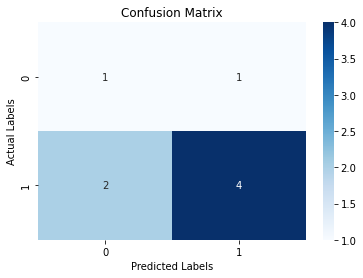

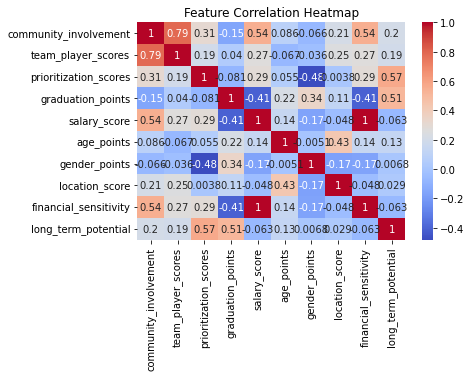

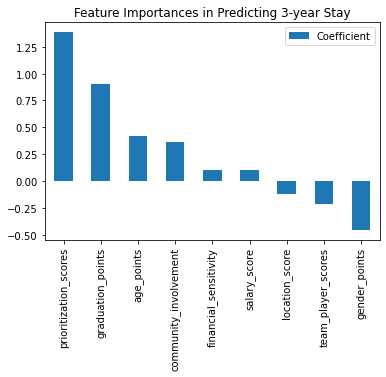

In [9]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate correlations
corr = students_df[features + ['long_term_potential']].corr()  # Changed to 'long_term_potential'

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Displaying the coefficient of each feature
feature_importance = pd.DataFrame(model.coef_[0], index=features, columns=['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
feature_importance.plot(kind='bar')
plt.title('Feature Importances in Predicting 3-year Stay')
plt.show()


## 3년 이상 계약 유지 예측 60% 이상 매칭된 지원자들 이름 및 확률

In [8]:
X_scaled = scaler.transform(students_df[features])

students_df['predicted_long_term_potential'] = model.predict(X_scaled)

predicted_long_term_students = students_df[students_df['predicted_long_term_potential'] == 1]['name']

print("Names of Students Predicted to Have Long-Term Potential:")
print(predicted_long_term_students)

Names of Students Predicted to Have Long-Term Potential:
0         Omer Yetiskul
1                  Juan
2            Jason Zhai
5      Gabrielle tsuker
7        Sevan Kejejian
8              Amy Kang
9              Kate Yeo
10                lynn 
12         Radhika Shah
15           Kevin Hyun
17      Danial Mohammed
19       Mustafa yawary
20       Stephanie Fang
21    Edison Rodriguez 
22    Sharona Hatanian 
23          Miguel Ruiz
24           Heily Shin
25           Ashli Phan
Name: name, dtype: object


In [10]:
predicted_probabilities = model.predict_proba(X_scaled)[:, 1]

students_df['predicted_probability'] = predicted_probabilities

predicted_students = students_df[students_df['predicted_long_term_potential'] == 1][['name', 'predicted_probability']]

predicted_students['predicted_probability'] = (predicted_students['predicted_probability'] * 68).round(2)

print("Names and Predicted Probabilities (in %) of Students Predicted to Have Long-Term Potential:")
print(predicted_students)

Names and Predicted Probabilities (in %) of Students Predicted to Have Long-Term Potential:
                 name  predicted_probability
0       Omer Yetiskul                  63.47
1                Juan                  55.18
2          Jason Zhai                  64.76
5    Gabrielle tsuker                  57.35
7      Sevan Kejejian                  64.45
8            Amy Kang                  47.59
9            Kate Yeo                  57.92
10              lynn                   58.49
12       Radhika Shah                  59.31
15         Kevin Hyun                  67.15
17    Danial Mohammed                  63.47
19     Mustafa yawary                  62.68
20     Stephanie Fang                  65.59
21  Edison Rodriguez                   66.27
22  Sharona Hatanian                   62.74
23        Miguel Ruiz                  64.90
24         Heily Shin                  35.49
25         Ashli Phan                  57.67
